# ✓ 필요한 라이브러리 import 하기

In [94]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.preprocessing import LabelEncoder# 인코딩하는놈
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


print('얍💢')


%matplotlib inline

얍💢


# ✓ 데이터 경로 지정하기

In [95]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle/Hackathon_0208/data'
#data_dir = os.getenv('HOME')+'/workplace/kaggle_contest/competitive-data-science-predict-future-sales/'

train_data_path = join(data_dir, 'sales_train.csv')
test_data_path = join(data_dir, 'test.csv')      # 테스트, 즉 submission 시 사용할 데이터 경로
item_category_path = join(data_dir,'item_categories.csv')
items_data_path = join(data_dir,'items.csv')
shops_data_path = join(data_dir,'shops.csv')
# test_data_path = join(data_dir,'test.csv')
sub_data_path = join(data_dir,'sample_submission.csv')

print(train_data_path)
print(test_data_path)
print(item_category_path)
print(items_data_path)
print(shops_data_path)
print(sub_data_path)

/home/aiffel-dj60/aiffel/kaggle/Hackathon_0208/data/sales_train.csv
/home/aiffel-dj60/aiffel/kaggle/Hackathon_0208/data/test.csv
/home/aiffel-dj60/aiffel/kaggle/Hackathon_0208/data/item_categories.csv
/home/aiffel-dj60/aiffel/kaggle/Hackathon_0208/data/items.csv
/home/aiffel-dj60/aiffel/kaggle/Hackathon_0208/data/shops.csv
/home/aiffel-dj60/aiffel/kaggle/Hackathon_0208/data/sample_submission.csv


# 1. 데이터 살펴보기
# ✓ 데이터 불러오기

In [96]:
train_data = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
item_category= pd.read_csv(item_category_path)
items = pd.read_csv(items_data_path)
shops =pd.read_csv(shops_data_path)
sub = pd.read_csv(sub_data_path)


print('train data dim : {}'.format(train_data.shape))
print('test data dim : {}'.format(test.shape))
print('item category data dim : {}'.format(item_category.shape))
print('items data dim : {}'.format(items.shape))
print('shops data dim : {}'.format(shops.shape))
print('sub data dim : {}'.format(sub.shape))


train data dim : (2935849, 6)
test data dim : (214200, 3)
item category data dim : (84, 2)
items data dim : (22170, 3)
shops data dim : (60, 2)
sub data dim : (214200, 2)


In [97]:
train_data.head(3) 

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0


In [98]:
train_data.tail(3) 

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [99]:
test.head(5) 

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [100]:
item_category.head(5)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [101]:
items.head(5) 

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [102]:
shops.head(5)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [103]:
sub.head(5)

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [104]:
print("train data 중복 수:",sum(train_data.duplicated()))
print("test  data 중복 수:",sum(test.duplicated()))

train data 중복 수: 6
test  data 중복 수: 0


### 중복 행 출력

In [105]:
train_data[train_data.duplicated() == True]


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0
2198566,31.12.2014,23,42,21619,499.0,1.0


### 중복 행 제거

In [106]:
# 중복 제거
train_data.drop_duplicates(inplace=True)

In [107]:
# 중복 재확인
sum(train_data.duplicated())

0

### 결측치 확인

In [108]:
#train데이터 결측치 확인
train_data.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [109]:
#test데이터 결측치 확인
test.isnull().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

### outlier (극단치) 제거

```
극단치란
통계적 자료 분석의 결과를 왜곡시키거나, 자료 분석의 적절성을 위협하는 변숫값 

[item_cnt_day]
1000과 2000이상의 동떨어진 데이터 들이 존재한다.
우리는 500이하로 범위로 좁혀주자.

[item_pirce]
30000이라는 동떨어진 데이터 존재
우리는 48000원이내의 값으로 범위를 좁혀주자

```

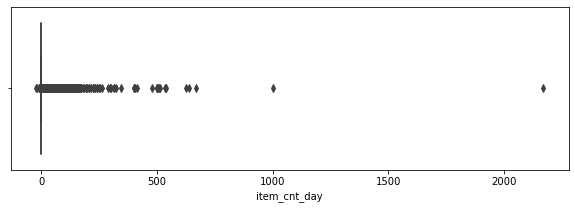

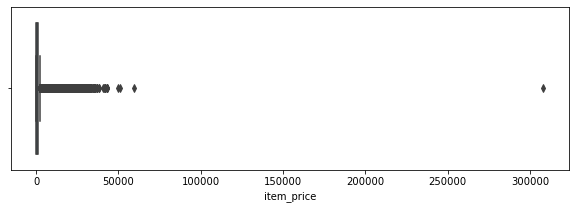

In [110]:
plt.figure(figsize=(10,3))
sns.boxplot(x='item_cnt_day', data=train_data);

###ver.03 추가
plt.figure(figsize=(10,3))
sns.boxplot(x='item_price', data=train_data);

In [111]:
#outlier (극단치) 제거
train_data = train_data[train_data.item_cnt_day < 500]

###ver.03이후 추가
train_data = train_data[train_data.item_price <= 48000]

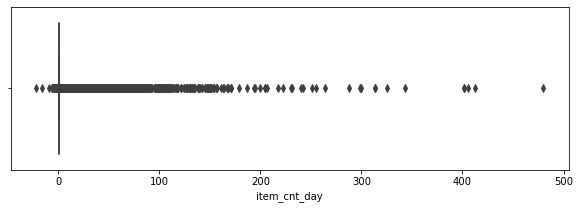

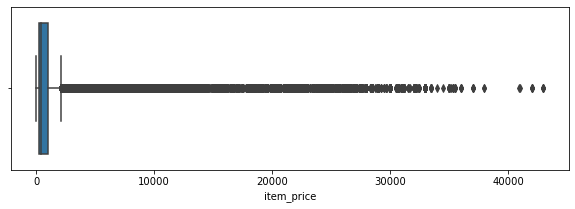

In [112]:
plt.figure(figsize=(10,3))
sns.boxplot(x='item_cnt_day', data=train_data);

###ver.0.3 추가
plt.figure(figsize=(10,3))
sns.boxplot(x='item_price', data=train_data);

In [113]:
### 음수값도 제거 해주자.

In [114]:
train_data = train_data[train_data.item_cnt_day >= 0]
###ver.0.3 추가
train_data = train_data[train_data.item_price >= 0]

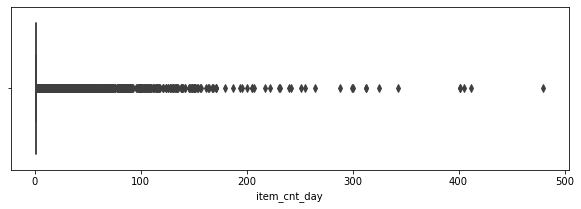

In [115]:
plt.figure(figsize=(10,3))
sns.boxplot(x='item_cnt_day', data=train_data);

In [116]:
print('train data dim : {}'.format(train_data.shape))

train data dim : (2928468, 6)


item_cnt_day에 대한 이상치 제거   
2935849 -> 2928473로 변경 

item_pirce에 대한 이상치 제거   
2928473 -> 2928469로 변경

# ------------------------------------------------------------------

# item에 관한 DATAFRAME 만들기

In [117]:
iteminfo = pd.merge(items, item_category, on='item_category_id')

In [118]:
iteminfo.head()

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD


# 판매에 관한 DATAFrame 만들기

In [119]:
sales_item_data = pd.merge(train_data, iteminfo, on='item_id')

In [120]:
sales_item_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


# sales_item_data에서 불필요한 데이터 제거

```
 4개 제거 ('item_price','date','item_category_name','item_name')
```

In [121]:
sales_item_data = sales_item_data.drop(['item_price','date','item_category_name','item_name'], axis=1)

In [122]:
sales_item_data.head()

,date_block_num,shop_id,item_id,item_cnt_day,item_category_id
0,0,59,22154,1.0,37
1,0,24,22154,1.0,37
2,0,27,22154,1.0,37
3,0,25,22154,1.0,37
4,0,25,22154,1.0,37


# sales_item_data 각 칼럼 데이터 int화 시키기

In [123]:
sales_item_data['shop_id'] = sales_item_data['shop_id'].apply(int)
sales_item_data['item_id'] = sales_item_data['item_id'].apply(int)
sales_item_data['item_category_id'] = sales_item_data['item_category_id'].apply(int)

# item_cnt_month로 그룹화해주기

In [124]:

groupSalesDf = sales_item_data.groupby(['date_block_num','item_id','item_category_id','shop_id']).sum()
groupSalesDf['item_cnt_month']=groupSalesDf['item_cnt_day']
groupSalesDf.drop('item_cnt_day', axis=1, inplace=True)
groupSalesDf.reset_index(inplace=True)
#groupSalesDf.drop('item_category_id', axis=1, inplace=True)
groupSalesDf

,date_block_num,item_id,item_category_id,shop_id,item_cnt_month
0,0,19,40,25,1.0
1,0,27,19,1,1.0
2,0,27,19,2,1.0
3,0,27,19,10,1.0
4,0,27,19,19,1.0
...,...,...,...,...,...
1608215,33,22167,49,28,1.0
1608216,33,22167,49,37,1.0
1608217,33,22167,49,42,4.0
1608218,33,22167,49,47,1.0


# month 칼럼 추가하기

칼럼이 추가되도 salesitemdata의 행의 갯수는 변하지 않는다.(1608223개)

In [125]:
groupSalesDf['month'] = groupSalesDf['date_block_num'] % 12
groupSalesDf.tail(3)

,date_block_num,item_id,item_category_id,shop_id,item_cnt_month,month
1608217,33,22167,49,42,4.0,9
1608218,33,22167,49,47,1.0,9
1608219,33,22167,49,50,1.0,9


In [126]:
groupSalesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608220 entries, 0 to 1608219
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   date_block_num    1608220 non-null  int64  
 1   item_id           1608220 non-null  int64  
 2   item_category_id  1608220 non-null  int64  
 3   shop_id           1608220 non-null  int64  
 4   item_cnt_month    1608220 non-null  float64
 5   month             1608220 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 73.6 MB


# item_cnt_month 수치 범위 확인해보기

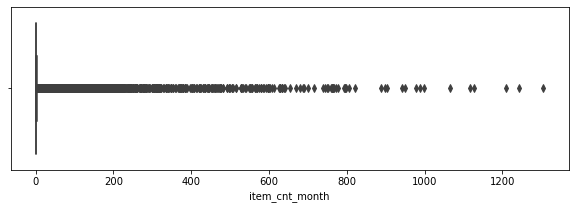

In [127]:
plt.figure(figsize=(10,3))
sns.boxplot(x='item_cnt_month', data=groupSalesDf);

## 그냥 짤라봤다 모델에 적용은 안한다.

In [128]:
# clip out sales of more than 20 in a month
clippedSales = groupSalesDf.copy()
clippedSales['item_cnt_month'].clip(0,20, inplace=True)
clippedSales['item_cnt_month'].max()

20.0

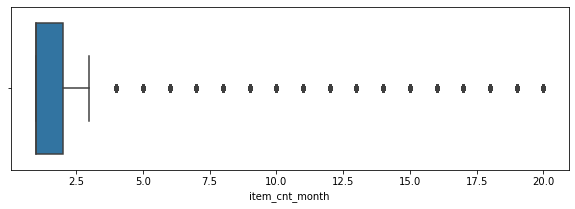

In [129]:
plt.figure(figsize=(10,3))
sns.boxplot(x='item_cnt_month', data=clippedSales);

# CITY_CODE 칼럼추가(정확도가 더 안나와서 제거)

In [130]:
#shops.head(2)

In [131]:
#shop에 city 칼럼 추가
#shops['city'] = shops['shop_name'].str.split(' ').map(lambda x: x[0])

In [132]:
#shops.head(2)

### city칼럼을 city_code로 인코딩 해주자

In [133]:
#shops.city.value_counts()

In [134]:
#LabelEncoder()를 사용하기 위한 라이브러리 추가
#city_encoder = LabelEncoder() #
#shops['city_code'] = city_encoder.fit_transform(shops['city'])
#shops = shops[['shop_id', 'city_code']]
#print(shops.shape)
#shops.head(5)

In [135]:
#groupSalesDf.shape

### merge로 groupSalesDf에 city_code칼럼을 추가

In [136]:
#groupSalesDf = pd.merge(left = groupSalesDf , right = shops, how = "inner", on = "shop_id")
#groupSalesDf.head(10)


In [137]:
#groupSalesDf.shape

### CITY_CODE 칼럼 사용안함
## ------------------------------------

# test 데이터는 34번째이다.

In [138]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


date_block_num	item_id	item_category_id	shop_id	item_cnt_month	month	city_code

In [139]:
test['date_block_num'] = '34'
test['date_block_num'] = test['date_block_num'].apply(int)
test


,ID,shop_id,item_id,date_block_num
0,0,5,5037,34
1,1,5,5320,34
2,2,5,5233,34
3,3,5,5232,34
4,4,5,5268,34
...,...,...,...,...
214195,214195,45,18454,34
214196,214196,45,16188,34
214197,214197,45,15757,34
214198,214198,45,19648,34


In [140]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   ID              214200 non-null  int64
 1   shop_id         214200 non-null  int64
 2   item_id         214200 non-null  int64
 3   date_block_num  214200 non-null  int64
dtypes: int64(4)
memory usage: 6.5 MB


#  test-set에 칼럼추가하기(ver0.4)

In [141]:
test

,ID,shop_id,item_id,date_block_num
0,0,5,5037,34
1,1,5,5320,34
2,2,5,5233,34
3,3,5,5232,34
4,4,5,5268,34
...,...,...,...,...
214195,214195,45,18454,34
214196,214196,45,16188,34
214197,214197,45,15757,34
214198,214198,45,19648,34


### test에  item_category_id 추가`

In [142]:
tmp=items.drop('item_name',axis=1)
test = pd.merge(test, tmp, on='item_id')
test

,ID,shop_id,item_id,date_block_num,item_category_id
0,0,5,5037,34,19
1,5100,4,5037,34,19
2,10200,6,5037,34,19
3,15300,3,5037,34,19
4,20400,2,5037,34,19
...,...,...,...,...,...
214195,193799,46,969,34,37
214196,198899,41,969,34,37
214197,203999,44,969,34,37
214198,209099,39,969,34,37


### month칼럼 추가

In [143]:
test['month'] = test['date_block_num'] % 12
test.tail(3)

,ID,shop_id,item_id,date_block_num,item_category_id,month
214197,203999,44,969,34,37,10
214198,209099,39,969,34,37,10
214199,214199,45,969,34,37,10


### ID 삭제

In [144]:
sub_id = test['ID']
test=test.drop('ID',axis=1)
test

,shop_id,item_id,date_block_num,item_category_id,month
0,5,5037,34,19,10
1,4,5037,34,19,10
2,6,5037,34,19,10
3,3,5037,34,19,10
4,2,5037,34,19,10
...,...,...,...,...,...
214195,46,969,34,37,10
214196,41,969,34,37,10
214197,44,969,34,37,10
214198,39,969,34,37,10


### 칼럼 위치 변경하기


In [145]:

Y_test= test[['date_block_num','item_id','item_category_id','shop_id','month']]

In [146]:
Y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   date_block_num    214200 non-null  int64
 1   item_id           214200 non-null  int64
 2   item_category_id  214200 non-null  int64
 3   shop_id           214200 non-null  int64
 4   month             214200 non-null  int64
dtypes: int64(5)
memory usage: 9.8 MB


<AxesSubplot:xlabel='date_block_num', ylabel='item_cnt_month'>

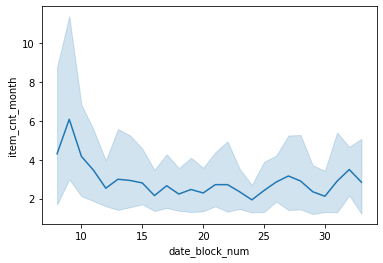

In [147]:
sns.lineplot(x='date_block_num', y='item_cnt_month', data=groupSalesDf[groupSalesDf['item_id']==22167])

### 최근데이터가 더 효율적이기 때문에 0~11 13년에 해당하는 데이터는 제외하자.(왜인지모르겠지만 적합한 스코어가 나오지 않는다 그래서 삭제)
```
new_traind에서
date_block_num은 0~33
0  =  January 2013
33 =  October 2015 이다
```

In [148]:
#groupSalesDf = groupSalesDf[groupSalesDf.date_block_num > 12]
#groupSalesDf

## 훈련데이터와 벨류데이션데이터 나누기

In [51]:
X_train = groupSalesDf[groupSalesDf.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = groupSalesDf[groupSalesDf.date_block_num < 33]['item_cnt_month']
X_valid = groupSalesDf[groupSalesDf.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = groupSalesDf[groupSalesDf.date_block_num == 33]['item_cnt_month']

print(X_train)
print(Y_train)
print(X_valid)
print(Y_valid)

         date_block_num  item_id  item_category_id  shop_id  month
740622               13       30                40        7      1
740623               13       30                40       14      1
740624               13       30                40       19      1
740625               13       30                40       24      1
740626               13       30                40       25      1
...                 ...      ...               ...      ...    ...
1576695              32    22167                49       21      8
1576696              32    22167                49       22      8
1576697              32    22167                49       24      8
1576698              32    22167                49       25      8
1576699              32    22167                49       42      8

[836078 rows x 5 columns]
740622     1.0
740623     1.0
740624     1.0
740625     1.0
740626     3.0
          ... 
1576695    2.0
1576696    4.0
1576697    1.0
1576698    4.0
1576699    4.0
Name

## LMS 노드 참고

In [52]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

print('얍💢')

얍💢


In [64]:
def get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2019).get_n_splits(X_train.values)
    for m in models:
        print("Model {} CV score : {:.4f}".format(m['name'], np.mean(cross_val_score(m['model'], X_train.values, y_train)), 
                                                  kf=kfold))
print('얍💢')

얍💢


In [65]:
get_cv_score(models)

Model GradientBoosting CV score : 0.1573
Model XGBoost CV score : 0.2437
Model LightGBM CV score : 0.2078


In [66]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

print('얍💢')

얍💢


In [67]:
test

,date_block_num,item_id,item_category_id,shop_id,month
0,34,5037,19,5,10
1,34,5037,19,4,10
2,34,5037,19,6,10
3,34,5037,19,3,10
4,34,5037,19,2,10
...,...,...,...,...,...
214195,34,969,37,46,10
214196,34,969,37,41,10
214197,34,969,37,44,10
214198,34,969,37,39,10


In [68]:
y_pred = AveragingBlending(models, X_train, y_train, Y_test)
print(len(y_pred))
y_pred

214200


array([0.88598495, 0.8778343 , 0.98663948, ..., 0.7693641 , 0.76648795,
       0.7693641 ])

In [72]:
result = pd.DataFrame({
    'ID' : sub.ID, 
    'item_cnt_month' : y_pred
})

result.head()

,ID,item_cnt_month
0,0,3.159405
1,1,3.078316
2,2,4.377404
3,3,3.074177
4,4,3.303041


In [73]:
my_submission_path = join(data_dir, 'submission_log_exp.csv')
result.to_csv(my_submission_path, index=False)

print(my_submission_path)

/home/aiffel-dj60/aiffel/kaggle/Hackathon_0208/data/submission_log_exp.csv


# 첫번째 시도
```
train_set     :  shop_id, item_id, data_block_num 설정
target_set  : item_cnt_month 설정 
```

In [49]:
get_cv_score(models)

Model GradientBoosting CV score : 0.2225
Model XGBoost CV score : 0.2812
Model LightGBM CV score : -0.0048


# 두번재 시도
```
train_set     :  shop_id, item_id, data_block_num, month, item_category_id 설정
target_set    : item_cnt_month 설정
```

In [164]:
get_cv_score(models)

Model GradientBoosting CV score : 0.2368
Model XGBoost CV score : 0.3536
Model LightGBM CV score : 0.3404


# 세번재 시도
```
두번째 와 칼럼 동일
13년에 해당하는 데이터는 제거후 훈련

이때 캐글socre 36.93064나옴

```

In [177]:
get_cv_score(models)

Model GradientBoosting CV score : 0.2869
Model XGBoost CV score : 0.4561
Model LightGBM CV score : 0.4227


# 네번째 시도
```
세번째에서
price에 관한 이상치 값 제거 추가
train_set : city_code 칼럼 추가
```

In [49]:
get_cv_score(models)

Model GradientBoosting CV score : 0.2838
Model XGBoost CV score : -0.0141
Model LightGBM CV score : -0.9715


# 다섯번째 시도
캐글 socre 37 -> 5.8로 변경   
'최근데이터가 더 효율적이기 때문에 0 ~ 11 13년에 해당하는 데이터는 제외하자'라고 했는데
그 제외부분 코드를 실행하지 않고 13년도~15년도 데이터를 모두 학습하여 5.8score 받음

In [58]:
get_cv_score(models)

Model GradientBoosting CV score : 0.2370
Model XGBoost CV score : 0.3615
Model LightGBM CV score : 0.3462


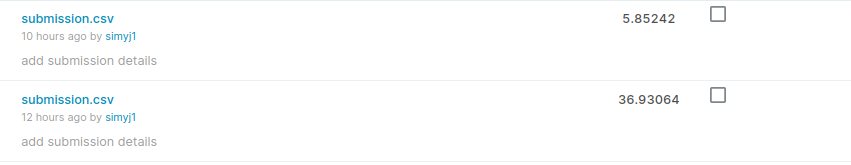

In [75]:
train_cnt_item = X_train['item_id'].nunique()
test_cnt_item = test['item_id'].nunique()
train_cnt_shop = X_train['shop_id'].nunique()
test_cnt_shop = test['shop_id'].nunique()

print("트레인셋 아이템갯수",train_cnt_item)
print("테스트셋 아이템갯수",test_cnt_item)
print("트레인셋 아이템갯수",train_cnt_shop)
print("테스트셋 아이템갯수",test_cnt_shop)

트레인셋 아이템갯수 21801
테스트셋 아이템갯수 5100
트레인셋 아이템갯수 60
테스트셋 아이템갯수 42


# 여섯번째 시도
 
1 ~5번째 시도는 앙상블로 돌렸는데 score가 낮게 나왔다.  
그래서 모델 한개 돌려보기로 하였다 (XGBRegressor)사용

```
(위 코드에서는 train-set(33),val-set(34)를 나누웠지만 이 여섯번째는 아직 val-생성전에 돌린 코드
 이 모델을 돌릴때는 train-set의 범위는0~33이다)
```

In [ ]:
from xgboost import XGBRegressor
xgboost = xgb.XGBRegressor(random_state=2019)
gboost = GradientBoostingRegressor(random_state=random_state)
model.fit(X_train, y_train) 

In [81]:
result = pd.DataFrame({
    'ID' : sub.ID, 
    'item_cnt_month' : y_pred
})
result

,ID,item_cnt_month
0,0,0.952533
1,1,0.950062
2,2,1.011363
3,3,0.945528
4,4,0.945528
...,...,...
214195,214195,0.843448
214196,214196,0.844069
214197,214197,0.837616
214198,214198,0.844069


In [82]:
my_submission_path = join(data_dir, 'submission_gboost.csv')
result.to_csv(my_submission_path, index=False)

print(my_submission_path)

/home/aiffel-dj60/aiffel/kaggle/Hackathon_0208/data/submission_gboost.csv


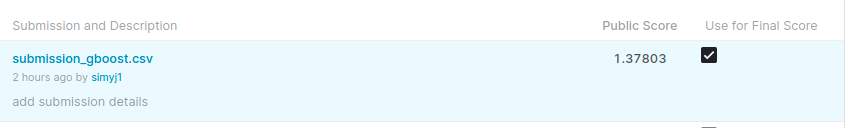

# 일곱번째 시도

lightgbm모델을 사용하고 train-set을 train(0~32)와 val(33)으로 나누워 돌려봤다.

rmse: 4.52782 으로 뜬다.
더 않좋게 뜬다.

예상으로 val-set은 33달의 값으로 가장최근 값인데 그것을 val-set으로 잡아서 최근의 데이터가 훈련이 안되니 적합한 socre가 안 나오는것으로 생각된다.

In [71]:
import lightgbm as lgb

def build_lgb_model(params, X_train, X_valid, Y_train, Y_valid, cat_features):
    lgb_train = lgb.Dataset(X_train, Y_train)
    lgb_val = lgb.Dataset(X_valid, Y_valid)
    model = lgb.train(params=params, train_set=lgb_train, valid_sets=(lgb_train, lgb_val), verbose_eval=50,
                     categorical_feature=cat_features)
    return model

params = {
    'objective': 'rmse',
    'metric': 'rmse',
    'num_leaves': 1023,
    'min_data_in_leaf':10,
    'feature_fraction':0.7,
    'learning_rate': 0.01,
    'num_rounds': 1000,
    'early_stopping_rounds': 30,
    'seed': 1
}
#designating the categorical features which should be focused on
cat_features = ['date_block_num','shop_id','item_id','item_category_id']

lgb_model = build_lgb_model(params, X_train, X_valid, Y_train, Y_valid, cat_features)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8766
[LightGBM] [Info] Number of data points in the train set: 836078, number of used features: 5
[LightGBM] [Info] Start training from score 2.265802
Training until validation scores don't improve for 30 rounds
[50]	training's rmse: 6.78232	valid_1's rmse: 5.12725
[100]	training's rmse: 5.77504	valid_1's rmse: 4.61078
[150]	training's rmse: 5.20071	valid_1's rmse: 4.55648
Early stopping, best iteration is:
[132]	training's rmse: 5.36242	valid_1's rmse: 4.52782
